## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [48]:
!pip install catboost
!pip install xgboost

In [49]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [50]:
df = pd.read_csv("data/stud.csv")

In [51]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
X = df.drop(['math_score'],axis=1)

In [53]:
y=df["math_score"]

In [54]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [55]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_tranformation = StandardScaler()
cat_tranformation = OneHotEncoder()

preprocessing = ColumnTransformer(
    [
        ("StandardScaler",numeric_tranformation,num_features),
        ("OnehotEncoder",cat_tranformation,cat_features)
         
         
    ]
)

In [56]:
X = preprocessing.fit_transform(X)

In [57]:
X

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
X_train.shape,X_test.shape

((750, 19), (250, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [60]:
def evalution_model(true,predicted):
    mae =mean_absolute_error(true,predicted)
    mse= mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true,predicted)
    return mae,mse,r2,rmse

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

##make prediction

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

##evaluting train and test
    model_train_mae, model_train_mse,model_train_r2score,model_train_rmse = evalution_model(y_train,y_train_pred)
    model_test_mae, model_test_mse,model_test_r2score,model_test_rmse = evalution_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Meas Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Meas Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2score))
    r2_list.append(model_test_r2score)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2972
- Mean Absolute Error: 4.2383
- Meas Squared Error: 28.0608
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4825
- Mean Absolute Error: 4.3379
- Meas Squared Error: 30.0581
- R2 Score: 0.8778


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5515
- Mean Absolute Error: 5.1837
- Meas Squared Error: 42.9222
- R2 Score: 0.8077
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6541
- Mean Absolute Error: 5.2217
- Meas Squared Error: 44.2774
- R2 Score: 0.8200


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2976
- Mean Absolute Error: 4.2368
- Meas Squared Error: 28.0642
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4788
- Mean Absolute Error: 4.3354
- Meas Squared Error: 30.0173
- R2

In [63]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Models","R2Score"]).sort_values(by=["R2Score"],ascending=False)

,Models,R2Score
2,Ridge,0.877990
0,Linear Regression,0.877824
7,CatBoosting Regressor,0.854830
5,Random Forest Regressor,0.848888
8,AdaBoost Regressor,0.845280
6,XGBRegressor,0.837904
1,Lasso,0.820028
3,K-Neighbors Regressor,0.794216
4,Decision Tree,0.772233


## Linear Regression

In [64]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.78


## Plot y_pred and y_test

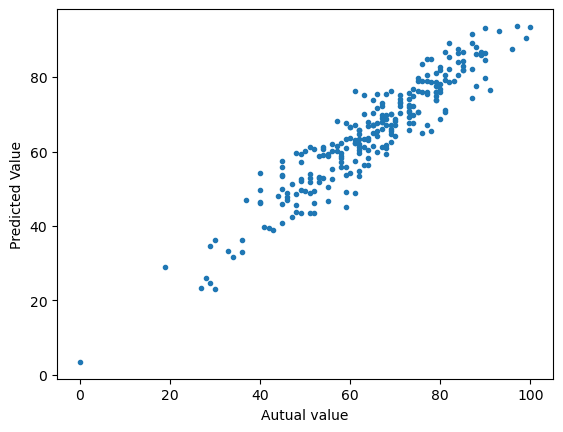

In [67]:
plt.plot(y_test,y_pred,'.');
plt.xlabel("Autual value");
plt.ylabel("Predicted Value");

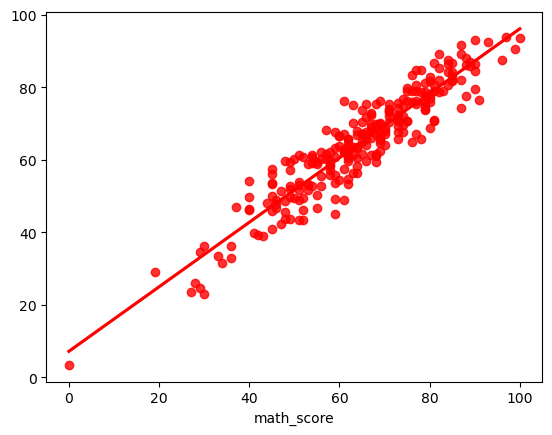

In [68]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [69]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.415556,14.584444
737,53,58.835356,-5.835356
740,80,76.907370,3.092630
660,74,76.760032,-2.760032
411,84,87.454007,-3.454007
...,...,...,...
109,70,64.035129,5.964871
430,64,63.158496,0.841504
77,80,82.733853,-2.733853
84,42,39.387374,2.612626
